# ASSOCIATION RULE MINING PROJECT

# Attribute Information:

Activity period -- Activity period of airplane

Operating Airline – Name of Airline under operation

Operating Airline IATA Code – Code associated with a particular airline

Published Airline – Name of the published airline

Published Airline IATA Code -- Code associated with the published airline

GEO Summary – Geography of the flight. Whether domestic or international.

GEO Region – Geographical region or the region where the flight has to be landed.

Activity Type Code – Whether the flight is enplaned or deplaned. Enplaned Passengers means departing from the Airport on a Local Flight.Deplaned Passengers means arriving at the Airport on a Local Flight.

Price Category Code – whether the prices range is low or belongs to some other category say discounted or high

Terminal –terminal associated with of the flight

Boarding Area – code of area associated with boarding.

Passenger Count – No. of passenger to be boarded

Year – year of boarding

Month – month of boarding

# AIR TRAFFIC STATISTICS

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('air_traffic_data.csv')
data

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Adjusted Passenger Count,Adjusted Activity Type Code,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271.0,2005.0,27271.0,Deplaned,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131.0,2005.0,29131.0,Enplaned,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415.0,2005.0,10830.0,Thru / Transit * 2,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156.0,2005.0,35156.0,Deplaned,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090.0,2005.0,34090.0,Enplaned,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,201101,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,International,G,10974.0,2011.0,10974.0,Deplaned,January
7772,201101,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,International,G,8048.0,2011.0,8048.0,Enplaned,January
7773,201101,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,E,17025.0,2011.0,17025.0,Deplaned,January
7774,201101,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 3,E,16758.0,2011.0,16758.0,Enplaned,January


## DATA PREPROCESSING

In [ ]:
from pandas_profiling import ProfileReport
report=ProfileReport(data)

In [ ]:
report

In [ ]:
# getting the shape
data.shape

(15007, 16)

In [ ]:
# reading the head of the data
data.head(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Adjusted Passenger Count,Adjusted Activity Type Code,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,27271,Deplaned,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,29131,Enplaned,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,10830,Thru / Transit * 2,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,35156,Deplaned,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,34090,Enplaned,July
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,2005,6263,Deplaned,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,2005,5500,Enplaned,July
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,2005,12050,Deplaned,July
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,2005,11638,Enplaned,July
9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998,2005,4998,Deplaned,July


In [ ]:
# creating column name's list
col = data.columns.to_list()

# printing number of unique values in each column.
data.nunique()

Activity Period                  129
Operating Airline                 77
Operating Airline IATA Code       73
Published Airline                 68
Published Airline IATA Code       64
GEO Summary                        2
GEO Region                         9
Activity Type Code                 3
Price Category Code                2
Terminal                           5
Boarding Area                      8
Passenger Count                11699
Year                              12
Adjusted Passenger Count       11702
Adjusted Activity Type Code        3
Month                             12
dtype: int64

# EDA


In [ ]:
data.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Year', 'Adjusted Passenger Count',
       'Adjusted Activity Type Code', 'Month'],
      dtype='object')

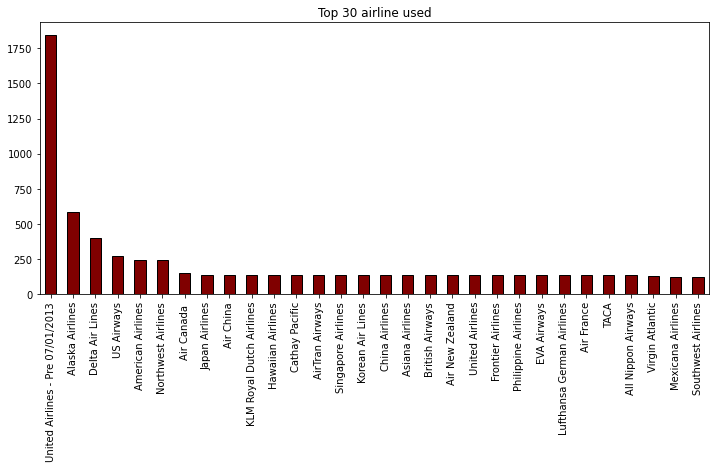

In [ ]:
plt.figure(figsize=(12,5))
data['Published Airline'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='maroon',edgecolor='k',align='center',linewidth=1)

plt.title('Top 30 airline used');

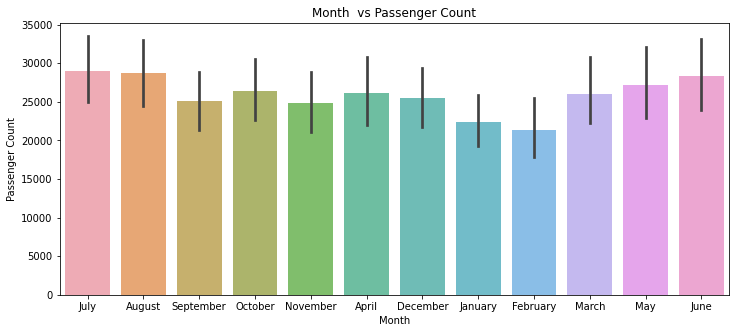

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['Month'],y=data['Passenger Count'],data = data,alpha=0.8)
plt.title('Month  vs Passenger Count');

In winter the number of people travelling is less.

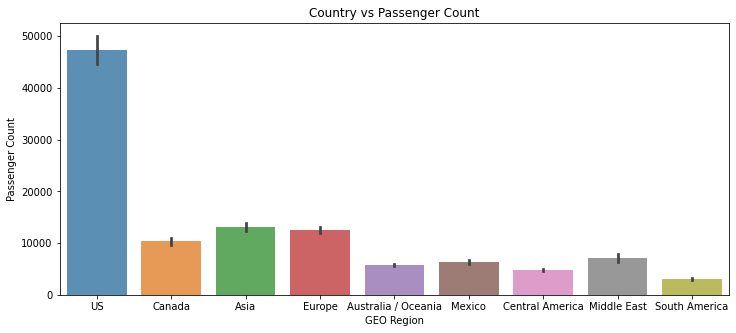

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['GEO Region'],y=data['Passenger Count'],data = data,alpha=0.8)
plt.title('Country vs Passenger Count');

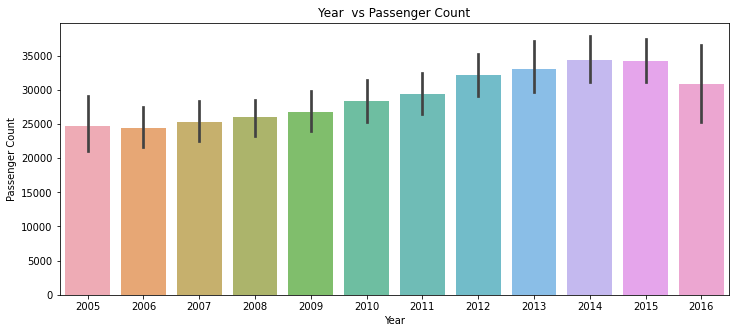

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['Year'],y=data['Passenger Count'],data = data,alpha=0.8)
plt.title('Year  vs Passenger Count');

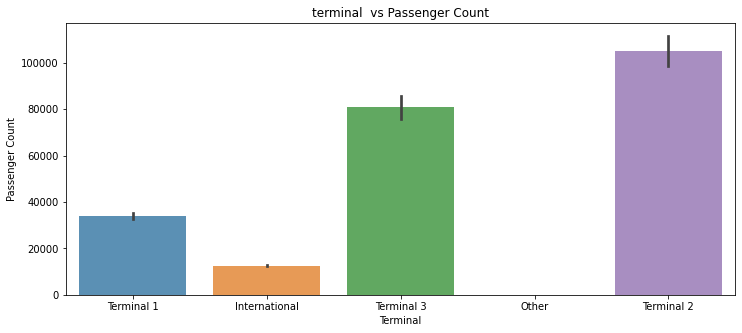

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['Terminal'],y=data['Passenger Count'],data = data,alpha=0.8)
plt.title('terminal  vs Passenger Count');


## RULE MINING

In [ ]:
df=data.drop(['Published Airline','Published Airline IATA Code','Adjusted Activity Type Code','Adjusted Passenger Count','Activity Period','Activity Type Code','Terminal','Boarding Area','Operating Airline IATA Code','Passenger Count','Year','Month'],axis=1)
df

,Operating Airline,GEO Summary,GEO Region,Price Category Code
0,ATA Airlines,Domestic,US,Low Fare
1,ATA Airlines,Domestic,US,Low Fare
2,ATA Airlines,Domestic,US,Low Fare
3,Air Canada,International,Canada,Other
4,Air Canada,International,Canada,Other
...,...,...,...,...
7771,United Airlines - Pre 07/01/2013,Domestic,US,Other
7772,United Airlines - Pre 07/01/2013,Domestic,US,Other
7773,United Airlines - Pre 07/01/2013,Domestic,US,Other
7774,United Airlines - Pre 07/01/2013,Domestic,US,Other


# Apriori

In [ ]:
r=[]

for i in range(0,4):
    r.append([str(df.values[i,j])for j in range(0,4)])

In [ ]:
#Build the Apriori model
association_rule=apriori(r,min_support = 0.025, min_confidence = 0.2,min_lift = 3 ,min_length = 2)
association_result=list(association_rule)

In [ ]:
# Print out the number of rules
print(len(association_result))

11


In [ ]:
#Have a glance at the rule
print(association_result)

[RelationRecord(items=frozenset({'Canada', 'Air Canada '}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Air Canada '}), items_add=frozenset({'Canada'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'Canada'}), items_add=frozenset({'Air Canada '}), confidence=1.0, lift=4.0)]), RelationRecord(items=frozenset({'International', 'Air Canada '}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Air Canada '}), items_add=frozenset({'International'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'International'}), items_add=frozenset({'Air Canada '}), confidence=1.0, lift=4.0)]), RelationRecord(items=frozenset({'Air Canada ', 'Other'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Air Canada '}), items_add=frozenset({'Other'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'Other'}), items_add=frozenset({'Air Canada '}), confidence=1.0, lift=4.0)]), 

In [ ]:
lift = []
association = []
for i in range (0, len(association_result)):
    lift.append(association_result[:len(association_result)][i][2][0][3])
    association.append(list(association_result[:len(association_result)][i][0]))

In [ ]:
rank = pd.DataFrame([association, lift]).transpose()
rank.columns = ['Association', 'Lift']

In [ ]:
# Show higher lift scores
rank.sort_values('Lift',ascending=False)

,Association,Lift
0,"[Canada, Air Canada ]",4
1,"[International, Air Canada ]",4
2,"[Air Canada , Other]",4
3,"[Canada, International]",4
4,"[Canada, Other]",4
5,"[International, Other]",4
6,"[Canada, International, Air Canada ]",4
7,"[Canada, Air Canada , Other]",4
8,"[International, Air Canada , Other]",4
9,"[Canada, International, Other]",4


# ECLAT

In [ ]:
df.isnull().sum()

Operating Airline      0
GEO Summary            0
GEO Region             0
Price Category Code    0
dtype: int64

In [ ]:
transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.values[i,j]) for j in range(len(df.columns))])

In [ ]:
itens = []
for i in range(0, len(transactions)):
    itens.extend(transactions[i])

# Finding unique items from transactions 
uniqueItems = list(set(itens))

In [ ]:
uniqueItems

['Mesaba Airlines',
 'Philippine Airlines',
 'Domestic',
 'Air Canada Jazz',
 'All Nippon Airways',
 'Boeing Company',
 'International',
 'British Airways',
 'SkyWest Airlines',
 'TACA',
 'Other',
 'Alaska Airlines',
 'American Airlines',
 'Miami Air International',
 'Spirit Airlines',
 'Evergreen International Airlines',
 'Southwest Airlines',
 'Air France',
 'Australia / Oceania',
 'US',
 'Delta Air Lines',
 'ExpressJet Airlines',
 'Jet Airways',
 'LAN Peru',
 'Low Fare',
 'Allegiant Air',
 'Mexicana Airlines',
 'Atlantic Southeast Airlines',
 'Mexico',
 'KLM Royal Dutch Airlines',
 'Singapore Airlines',
 'Northwest Airlines',
 'JetBlue Airways ',
 'AirTran Airways',
 'Emirates ',
 'World Airways',
 'South America',
 'Middle East',
 'Servisair',
 'Virgin Atlantic',
 'Asia',
 'Frontier Airlines',
 'Asiana Airlines',
 'Hawaiian Airlines',
 'Lufthansa German Airlines',
 'ATA Airlines',
 'Sun Country Airlines',
 'Xtra Airways',
 'Europe',
 'Air China',
 'Cathay Pacific',
 'Japan Airlines

In [ ]:
pair = []
for j in range(0, len(uniqueItems)):
    k = 1;
    while k <= len(uniqueItems):
        try:
            pair.append([uniqueItems[j], uniqueItems[j+k]])
        except IndexError:
            pass
        k = k + 1;  

In [ ]:
len(pair)

3240

In [ ]:
%%time
score = []
for i in pair:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('' + ''.join(cond))
    #mycode = "print 'hello world'"
    score.append((len(mycode))/len(df))

CPU times: user 7.92 ms, sys: 0 ns, total: 7.92 ms
Wall time: 13.2 ms


In [ ]:
ranking_ECLAT = pd.DataFrame([pair, score]).transpose()
ranking_ECLAT.columns = ['Pair', 'Score']

In [ ]:
ranking_ECLAT.sort_values('Score', ascending=False).head(10)

,Pair,Score
3232,"[Evergreen International Airlines, United Airl...",0.00546412
3252,"[Evergreen International Airlines, Atlantic So...",0.00513094
3528,"[United Airlines - Pre 07/01/2013, Atlantic So...",0.00513094
3239,"[Evergreen International Airlines, Lufthansa G...",0.00499767
3515,"[United Airlines - Pre 07/01/2013, Lufthansa G...",0.00499767
2012,"[KLM Royal Dutch Airlines, Evergreen Internati...",0.00493103
2020,"[KLM Royal Dutch Airlines, United Airlines - P...",0.00493103
2647,"[American Eagle Airlines, United Airlines - Pr...",0.0048644
2639,"[American Eagle Airlines, Evergreen Internatio...",0.0048644
2587,"[Miami Air International, Evergreen Internatio...",0.0048644


RULES:
Total 11 Associate rules were generated from the dataset:
1.  Maximum Flights are from country Canada of Airlines Air Canada.
2.  Most of the International Flights are from Air Canada airlines.
3. The fare Price of Air Canada is most preferable.
4.  Most of the International flights take off from Canada.
5.  The fare price of Canada flights are most preferred.
6.  The fare price of International Price dominates over Domestic.
7. Most of the passengers prefer International flights from Canada of Air Canada Airlines.
8.  Most of the passengers prefer Fare cost of Air Canada Airlines of Canada.
9.  Most of the passengers prefer Cost of International flights of Air Canada Airlines.
10. Most of the passengers prefer Cost of International flights of Canada.
11.  Most of the passengers prefer Cost of International flights of Canada from Air Canada Airlines.
**RECOMMENDATIONS:**
1. From the Rules generated we can conclude that most of the passengers prefer International flights from Canada of Air Canada airlines.
Canada country is on high demand for Airlines as compared to other countries. Flight costs are also reasonable.
2. In winter we should make our flight more comfartable so that number of passengers increase as in winter less number of people travel because of cold .
3. To promotes Asian countries airline we should promote there culture more so that it will also be in demand and make catelog accordingly
4. Some airline are not used so we need to remove them so to cut the cost 
5. As, some airlines are medium used so make there quality good.
6. usa and canada airline should use more employess


